In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("health care diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.corr

<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
x = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = data["Outcome"]

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
x_test,x_train,y_test,y_train = train_test_split(x,y , test_size=0.2, random_state = 42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.intercept_

-0.7211513464967236

In [15]:
model.coef_

array([ 5.33606750e-02,  7.17786029e-03, -2.03443194e-03, -1.55534181e-04,
        7.46333666e-05,  8.22334969e-03,  3.63114829e-01, -9.26549893e-03])

In [16]:
y = -0.7211513464967236 + 5.33606750e-02*1 + 7.17786029e-03*85 +(-2.03443194e-03*66)+(-1.55534181e-04*29)+7.46333666e-05*0 + 8.22334969e-03*26.6 + 3.63114829e-01*0.351 +(-9.26549893e-03*31)     

In [17]:
y #1	85	66	29	0	26.6	0.351	31

-0.1374916062327236

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([-9.56783013e-02,  6.26595567e-01,  5.09233718e-01,  2.82765794e-03,
        4.60078143e-01,  3.09269470e-01,  6.06871320e-01,  7.28616259e-01,
        2.11732084e-01, -1.49281477e-01,  1.21353075e-01,  8.64793441e-01,
       -1.45363750e-02,  4.26711193e-01,  7.26575823e-01,  8.93451495e-01,
        6.24905105e-01,  2.98624635e-01,  2.69952068e-01,  7.17730622e-01,
        7.49144520e-01,  8.43621596e-02,  1.90747469e-01,  4.66461952e-01,
        3.31967006e-01,  2.73274543e-01,  5.95146330e-01,  4.06435986e-01,
        2.66987751e-01,  4.74979065e-01,  6.66772063e-01,  1.29395472e-01,
       -7.12165674e-03,  2.49862177e-02,  5.26258003e-01,  5.73017812e-01,
        2.74617256e-03,  9.04634903e-02,  1.02085742e+00,  4.19727134e-01,
       -3.49491038e-01,  3.83458744e-02, -1.32043074e-01,  8.72083042e-02,
        2.65816819e-01,  6.75010502e-01,  3.57551052e-01,  5.55266880e-04,
        3.12909365e-02,  7.73085603e-01,  6.76619633e-01,  1.90211129e-01,
        8.56478748e-02,  

In [20]:
y_test.head(15)

60     0
618    1
346    0
294    0
231    1
340    0
535    1
306    1
718    0
90     0
377    0
235    1
158    0
69     0
260    0
Name: Outcome, dtype: int64

In [21]:
mse = mean_squared_error(y_test,y_pred)
mse

0.19159883476445438

In [22]:
rmse = np.sqrt(mse)
rmse

0.43772004153848654

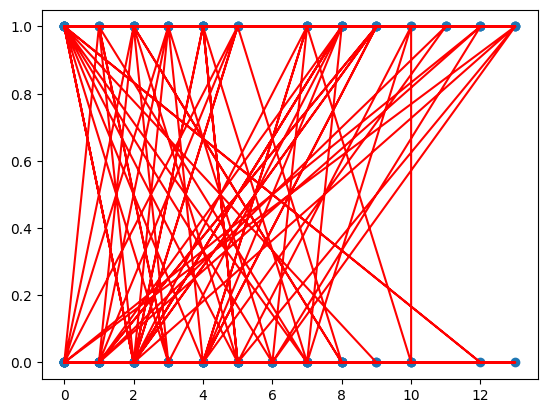

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x_train.iloc[:, 0], y_train)
plt.plot(x_train.iloc[:, 0], y_train, color = 'red')

plt.show()

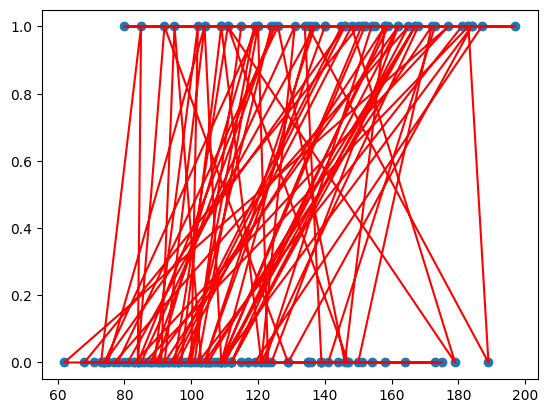

In [24]:
plt.scatter(x_train.iloc[:, 1], y_train)
plt.plot(x_train.iloc[:, 1], y_train, color = 'red')
plt.show()